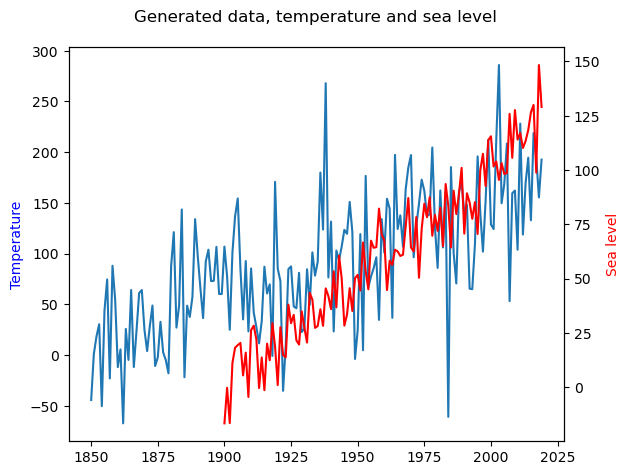

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# generate data
t_short = np.arange(1900, 2020)
t_long = np.arange(1850, 2020)

T = np.sin(2 * np.pi * (t_long - 1950) / 30) + 50 * np.random.randn(len(t_long)) + t_long-t_long[0] * 1
k, l = 1, 0.01
S = k * (t_short - t_short[0])  +  np.random.randn(len(t_short)) * 10


# have a look
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(t_long, T, label='Temperature')
ax2.plot(t_short, S, label='Sea level', color='red')
ax.set_ylabel('Temperature', color='blue')
ax2.set_ylabel('Sea level', color='red')
fig.suptitle('Generated data, temperature and sea level')
plt.tight_layout()
plt.show()


In [46]:
# model
def get_S(T, a, b, S_0, tau):
    # Calculate equilibrium sea level
    S_eq = a * T + b

    # Initialize S
    S = np.zeros(len(T))
    S[0] = S_0
    for i in range(1, len(T)):
        S[i] = S[i-1] + ((S_eq[i-1] - S[i-1]) / tau)
    return S

def error(S, S_pred):
    # align
    S_pred = S_pred[-len(S):]
    return np.sum((S - S_pred)**2)**0.5

# check if the model is working
a, b, S_0, tau = 0.01, 0.01, 0, 10
S_pred = get_S(T, a, b, S_0, tau)
err = error(S, S_pred)
print(err)

758.0300874172682


In [47]:
# now optimize
def objective(params):
    a, b, S_0, tau = params
    S_pred = get_S(T, a, b, S_0, tau)
    return error(S, S_pred)

res = minimize(objective, x0=[a, b, S_0, tau])
print(res)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 118.1513575274447
        x: [ 1.932e+01  5.586e+03 -3.954e+01  7.575e+03]
      nit: 95
      jac: [ 1.446e-02  2.146e-04  1.681e-02 -1.984e-04]
 hess_inv: [[ 1.793e+04  4.988e+06  1.699e+03  6.902e+06]
            [ 4.988e+06  1.389e+09  4.715e+05  1.922e+09]
            [ 1.699e+03  4.715e+05  1.630e+02  6.529e+05]
            [ 6.902e+06  1.922e+09  6.529e+05  2.659e+09]]
     nfev: 807
     njev: 159


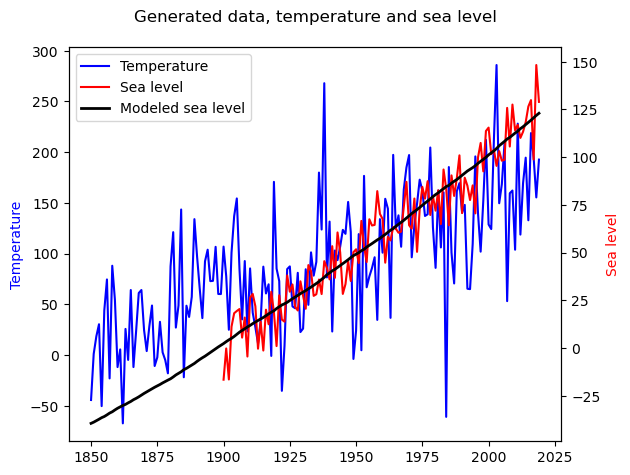

In [48]:
# have a look
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(t_long, T, label='Temperature', color='blue')
ax2.plot(t_short, S, label='Sea level', color='red')
ax2.plot(t_long, get_S(T, *res.x), label='Modeled sea level', color='black', lw=2)

ax.set_ylabel('Temperature', color='blue')
ax2.set_ylabel('Sea level', color='red')
fig.suptitle('Generated data, temperature and sea level')

# combine legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')
plt.tight_layout()

plt.show()